# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
pengiuns=load_penguins()

In [ ]:
pd.get_dummies(pengiuns[['species']])

,species_Adelie,species_Chinstrap,species_Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
339,False,True,False
340,False,True,False
341,False,True,False
342,False,True,False


In [ ]:
pd.get_dummies(pengiuns)
#this is bad since make coulmns u dont want

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


In [ ]:
enc=OneHotEncoder()

enc.fit(pengiuns[['species']]) ##this is where the robot learns variables

enc.transform(pengiuns[['species']]).toarray()

#enc.fit(pengiuns) ##this is where the robot learns variables

#enc.transform(pengiuns).toarray()

#enc.categories_

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#scaler.fit_transform(pengiuns[["bill_length_mm"]])

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [ ]:
pengiuns= pengiuns.dropna()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import r2_score

Linear model

In [ ]:
y=pengiuns["bill_depth_mm"]
X=pengiuns[["bill_length_mm"]]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
lr_fit = lr.fit(X_train, y_train)
lr_fit.coef_

array([-0.07257898])

In [ ]:
y_pred_lr1 = lr_fit.predict(X_train)

In [ ]:
y_pred_lr = lr_fit.predict(X_test)

In [ ]:
final_model = lr.fit(X, y)
final_model.coef_

array([-0.08232675])

In [ ]:
r2_score(y_train, y_pred_lr1)

0.04083055005462588

In [ ]:
mean_squared_error(y_train, y_pred_lr1)

3.7911018967103027

In [ ]:
r2_score(y_test, y_pred_lr)

0.0855114339285683

In [ ]:
mean_squared_error(y_test, y_pred_lr)

3.3000232321583463

In [ ]:
pred=lr_fit.predict(X)

In [ ]:
from plotnine import *

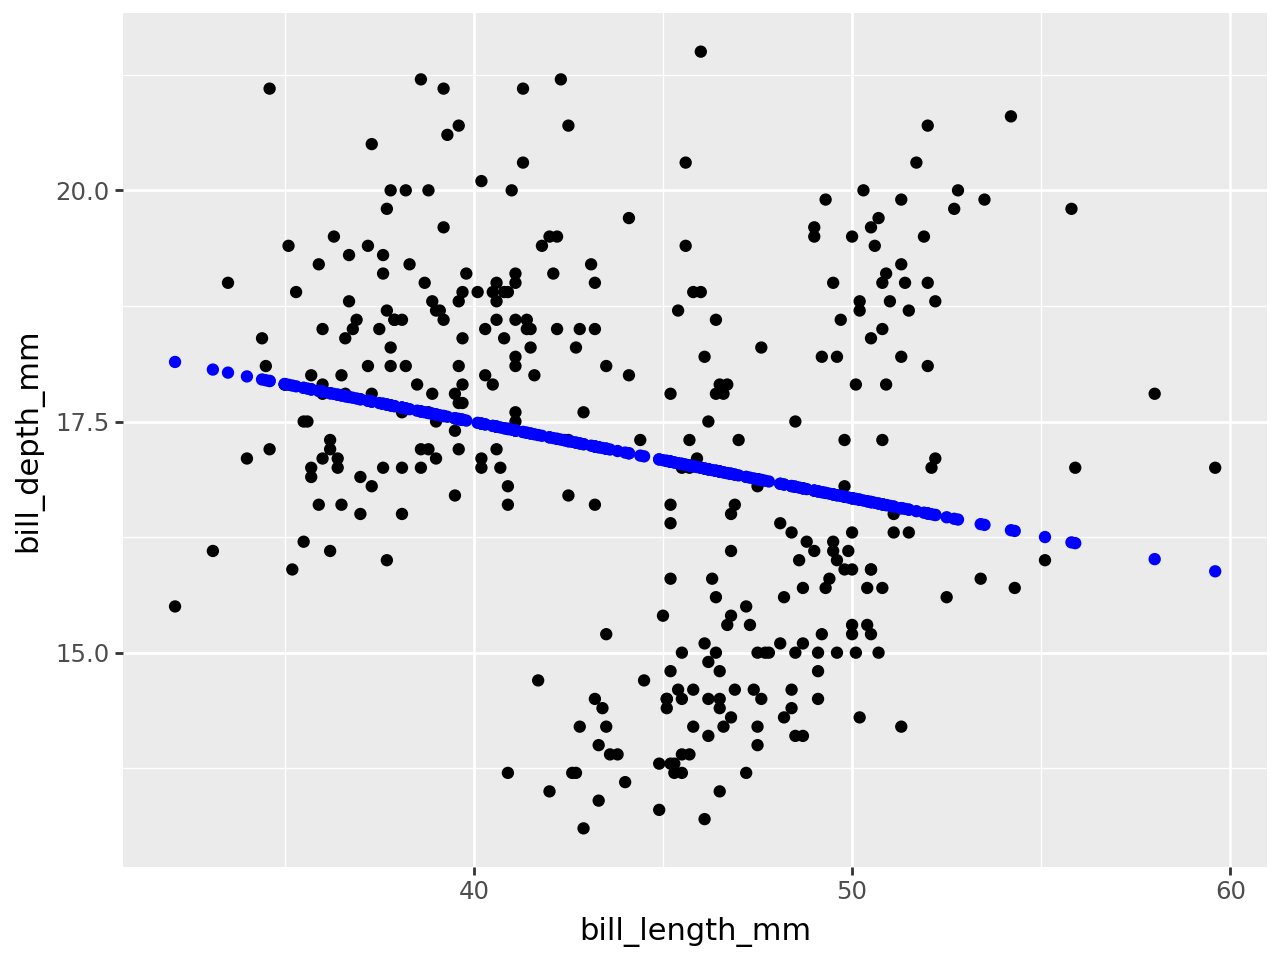

In [ ]:
 (ggplot(pengiuns, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred), color="blue")
)

This one underfits the model since r2 is super low

for degree 2

In [ ]:
y5=pengiuns["bill_depth_mm"]
X5=pengiuns[["bill_length_mm"]]
X5["bill_sq"] = X5["bill_length_mm"]**2

<ipython-input-24-f9d23412caeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.25)
lr5_fit = lr.fit(X5_train, y5_train)
lr5_fit.coef_
y5_pred_lr = lr5_fit.predict(X5_test)
y5_pred_lr1 = lr5_fit.predict(X5_train)
mean_squared_error(y5_test, y5_pred_lr)
final_model = lr.fit(X5, y5)
final_model.coef_


array([-1.40407712,  0.01498039])

In [ ]:
r2_score(y5_train, y5_pred_lr1)

0.11568728778122916

In [ ]:
mean_squared_error(y5_train, y5_pred_lr1)

3.377253018890511

In [ ]:
r2_score(y5_test, y5_pred_lr)

0.08298880028573086

In [ ]:
mean_squared_error(y5_test, y5_pred_lr)

3.6431077085791324

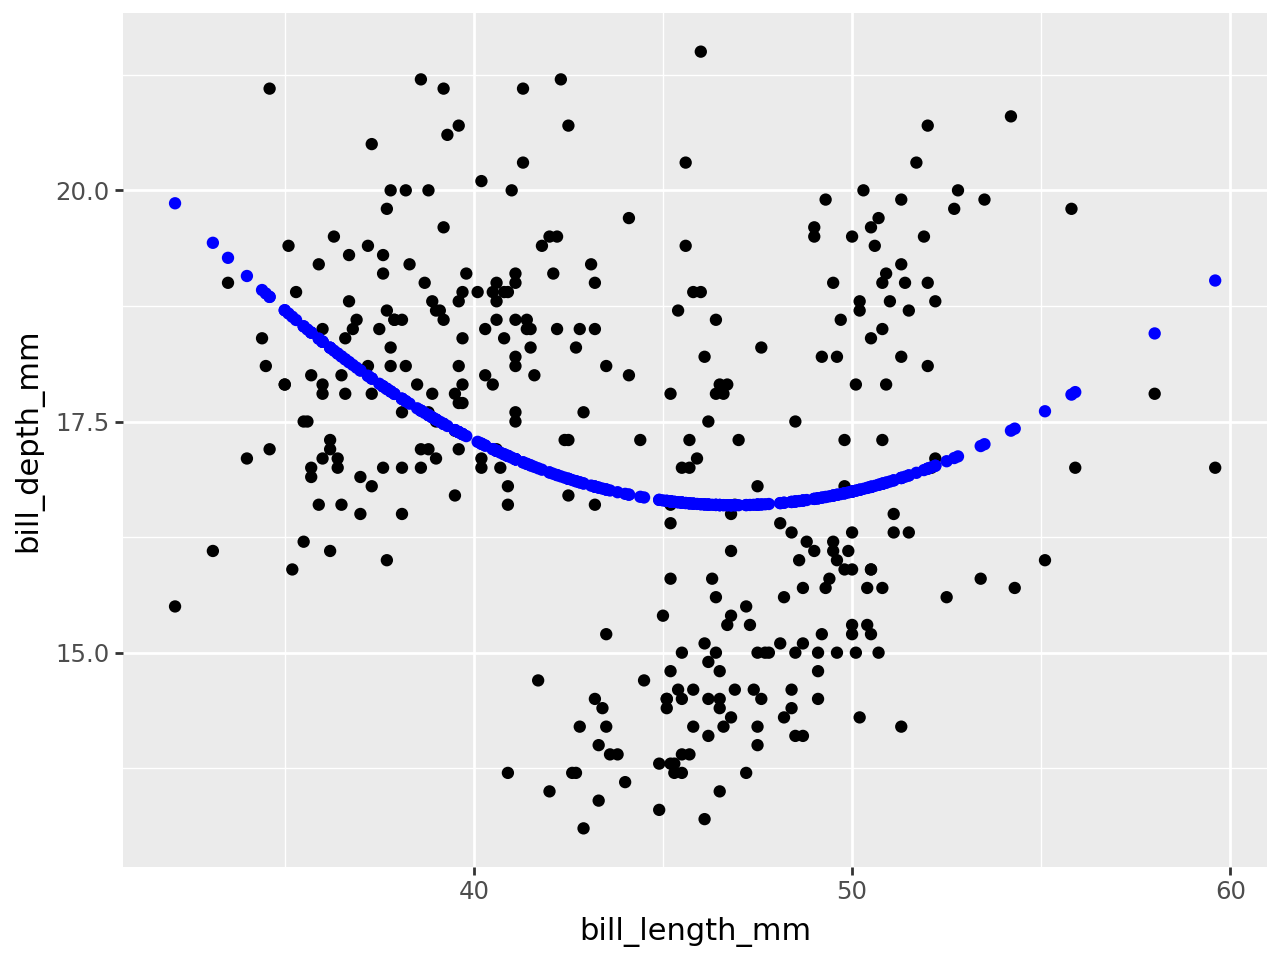

In [ ]:
pred=lr_fit.predict(X5)
(ggplot(pengiuns, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred), color="blue")
)

for degree 3

In [ ]:
y2=pengiuns["bill_depth_mm"]
X2=pengiuns[["bill_length_mm"]]
X2["bill_sq"] = X2["bill_length_mm"]**2
X2["bill_cub"] = X2["bill_length_mm"]**3

<ipython-input-31-da82920bc4d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-31-da82920bc4d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25)
lr2_fit = lr.fit(X2_train, y2_train)
lr2_fit.coef_
y2_pred_lr = lr2_fit.predict(X2_test)
y2_pred_lr1 = lr2_fit.predict(X2_train)
mean_squared_error(y2_test, y2_pred_lr)
final_model = lr.fit(X2, y2)
final_model.coef_


array([ 6.77963360e+00, -1.68915134e-01,  1.36264370e-03])

In [ ]:
mean_squared_error(y2_train, y2_pred_lr1)

3.4697741229590373

In [ ]:
r2_score(y2_train, y2_pred_lr1)

0.15020337656214855

In [ ]:
r2_score(y2_test, y2_pred_lr)

0.03963549418612877

In [ ]:
mean_squared_error(y2_test, y2_pred_lr)

3.0836629195522858

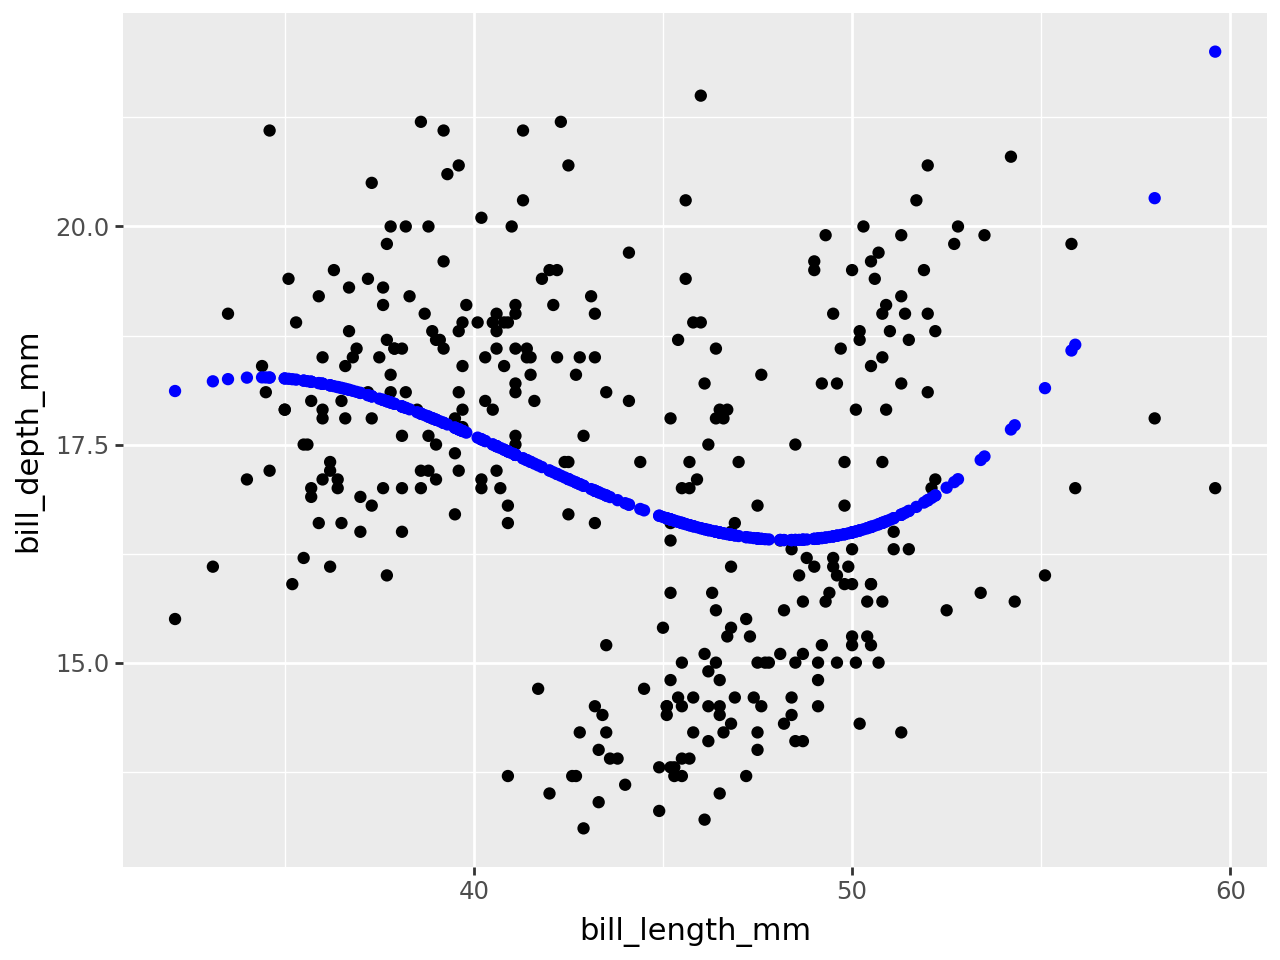

In [ ]:
pred=lr_fit.predict(X2)
(ggplot(pengiuns, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred), color="blue")
)

Degree 10

In [ ]:
y1=pengiuns["bill_depth_mm"]
X1=pengiuns[["bill_length_mm"]]
X1["bill_sq"] = X1["bill_length_mm"]**2
X1["bill_cub"] = X1["bill_length_mm"]**3
X1["bill_4"] = X1["bill_length_mm"]**4
X1["bill_5"] = X1["bill_length_mm"]**5
X1["bill_6"] = X1["bill_length_mm"]**6
X1["bill_7"] = X1["bill_length_mm"]**7
X1["bill_8"] = X1["bill_length_mm"]**8
X1["bill_9"] = X1["bill_length_mm"]**9
X1["bill_10"] = X1["bill_length_mm"]**10
print(X1)

     bill_length_mm  bill_sq    bill_cub        bill_4        bill_5  \
0              39.1  1528.81   59776.471  2.337260e+06  9.138687e+07   
1              39.5  1560.25   61629.875  2.434380e+06  9.615801e+07   
2              40.3  1624.09   65450.827  2.637668e+06  1.062980e+08   
4              36.7  1346.89   49430.863  1.814113e+06  6.657794e+07   
5              39.3  1544.49   60698.457  2.385449e+06  9.374816e+07   
..              ...      ...         ...           ...           ...   
339            55.8  3113.64  173741.112  9.694754e+06  5.409673e+08   
340            43.5  1892.25   82312.875  3.580610e+06  1.557565e+08   
341            49.6  2460.16  122023.936  6.052387e+06  3.001984e+08   
342            50.8  2580.64  131096.512  6.659703e+06  3.383129e+08   
343            50.2  2520.04  126506.008  6.350602e+06  3.188002e+08   

           bill_6        bill_7        bill_8        bill_9       bill_10  
0    3.573226e+09  1.397132e+11  5.462784e+12  2.135949e+14

<ipython-input-38-ca7d4e78a96e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-38-ca7d4e78a96e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-38-ca7d4e78a96e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-38-ca7d4e78a96e>

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25)
lr1_fit = lr.fit(X1_train, y1_train)
y1_pred_lr = lr1_fit.predict(X1_test)
y1_pred_lr1 = lr1_fit.predict(X1_train)
mean_squared_error(y1_test, y1_pred_lr)
#final_model = lr.fit(X1, y1)
#final_model.coef_

3.8237024881349995

In [ ]:
r2_score(y1_train, y1_pred_lr1)

0.3685504270084563

In [ ]:
mean_squared_error(y1_train, y1_pred_lr1)

2.46129125879902

In [ ]:
r2_score(y1_test, y1_pred_lr)

-0.0377690677741529

In [ ]:
mean_squared_error(y1_test, y1_pred_lr)

3.8237024881349995

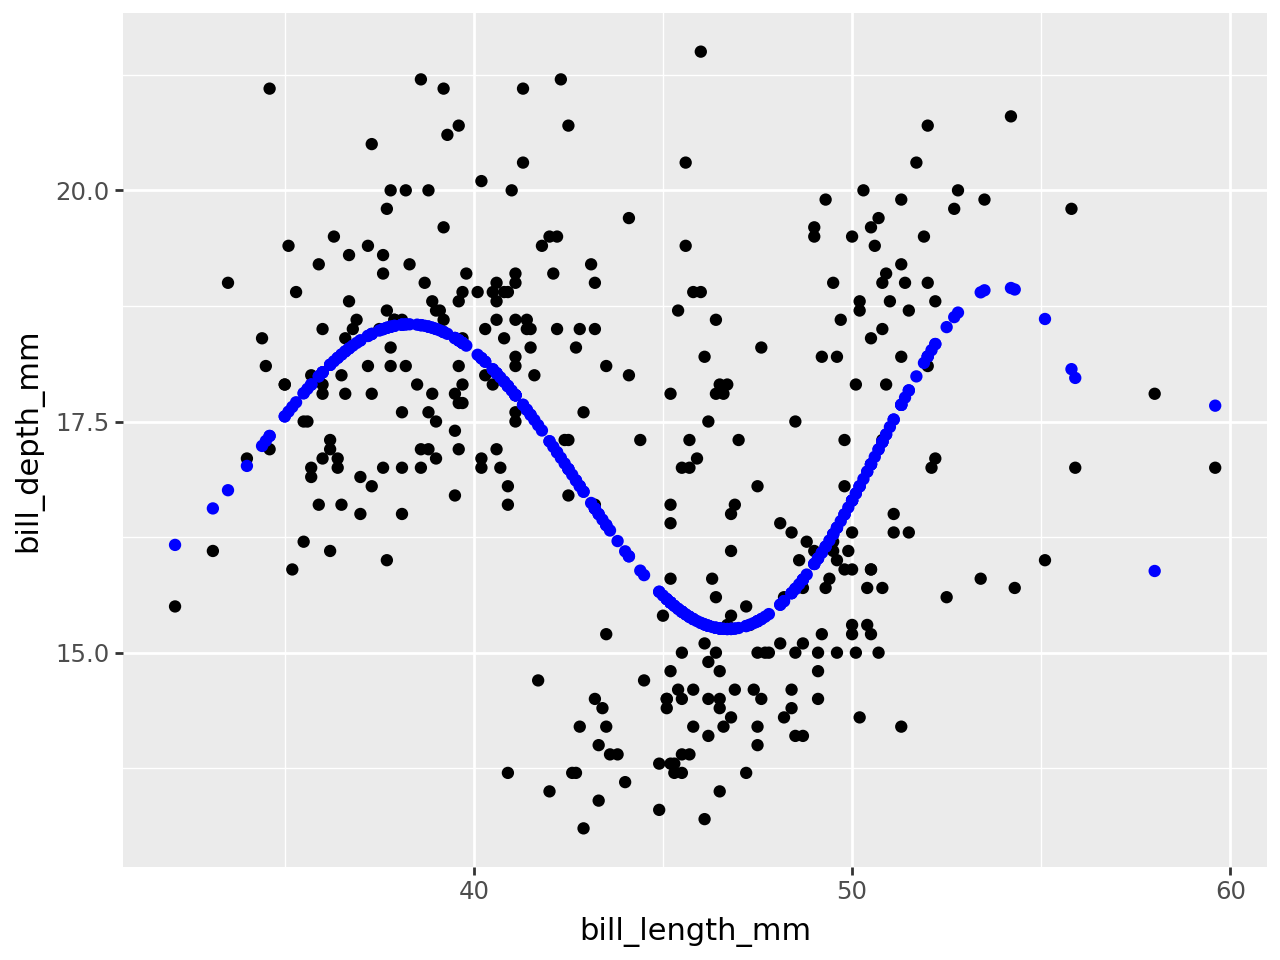

In [ ]:
pred=lr_fit.predict(X1)
(ggplot(pengiuns, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred), color="blue")
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

the first three models are underfitting the model, you can tell because the the r2 values are really low for both the train and test data.

I personally think that degree ten fits the data the best. Because it follows the sin graph generally like the sample data.